In [1]:
# Import our dependncies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# Create the engine for our SQLite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model

# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Create our inspector, this isn't necessary, but I use it to find the column names as shown below
inspector = inspect(engine)

In [11]:
# Visualize the column names in the measurement table
inspector.get_columns('measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

# Exploratory Climate Analysis

In [60]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Extract the last row from our data
lastrow = engine.execute('SELECT * FROM measurement WHERE id=(SELECT max(id) FROM measurement)').fetchall()

# Convert the date into a datetime object
lastdate = dt.datetime.strptime(lastrow[0][2],'%Y-%m-%d')


# Generate our data from one year prior to the last data in our table
# 52 weeks is typically considered a year but that's actually only 364 days
yearago = lastdate - dt.timedelta(days = 1, weeks = 52)


measurement_df = pd.DataFrame(session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > yearago).all())

In [61]:


measurement_df = measurement_df.dropna()
measurement_df = measurement_df.sort_values('date')

measurement_df.head(30)


,date,prcp
0,2016-08-24,0.08
1188,2016-08-24,1.22
702,2016-08-24,2.28
1875,2016-08-24,1.45
360,2016-08-24,2.15
1524,2016-08-24,2.15
1189,2016-08-25,0.21
1,2016-08-25,0.08
1007,2016-08-25,0.00
1525,2016-08-25,0.06


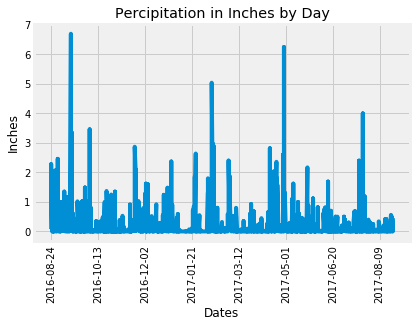

In [62]:
# Plot the data for date and percipitation
plt.plot(measurement_df['date'],measurement_df['prcp'])


# Found the number of rows that we should skip to make the dates much more readable
N = 50  
# Pull out all of the ticks
xticks_pos, xticks_labels = plt.xticks()
# Just take every 50th tick
myticks = [i for i,j in enumerate(xticks_pos) if not i%N]
#Rotate
plt.xticks(myticks, rotation=90)

plt.xlabel('Dates')

plt.ylabel('Inches')
plt.title('Percipitation in Inches by Day')

plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
# Design a query to show how many stations are available in this dataset
inspector.get_columns('station')
stationlist = engine.execute('select * from station').fetchall()
print(f'The total number of stations in this dataset is: {len(stationlist)}')

The total number of stations in this dataset is: 9


In [17]:
# Print out all of our station information, I reference this later so it's easier to have it visible
for station in stationlist:
    print(station)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [18]:
# Visualize our column titles for the station table
inspector.get_columns('station')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# Query our database to find the number of observations from each station
stationscount = engine.execute(f'SELECT station, count(tobs) FROM measurement GROUP BY station ORDER BY count(tobs) DESC').fetchall()
# Print out the stations in a nice format
for station in stationscount:
    print(f'Station ID: {station[0]} Measurement Count: {station[1]}')

Station ID: USC00519281 Measurement Count: 2772
Station ID: USC00519397 Measurement Count: 2724
Station ID: USC00513117 Measurement Count: 2709
Station ID: USC00519523 Measurement Count: 2669
Station ID: USC00516128 Measurement Count: 2612
Station ID: USC00514830 Measurement Count: 2202
Station ID: USC00511918 Measurement Count: 1979
Station ID: USC00517948 Measurement Count: 1372
Station ID: USC00518838 Measurement Count: 511


In [70]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
# Retrieve the station with the most observations
activestation = stationscount[0][0]
activestation
measuretemp = pd.DataFrame(session.query(Measurement.station,Measurement.date, Measurement.tobs).filter(Measurement.date > yearago).all())
small_df = measuretemp.loc[measuretemp['station'] == activestation,:]
# Extract the values of interest
maxtemp = small_df['tobs'].max()
mintemp = small_df['tobs'].min()
avgtemp = round(small_df['tobs'].mean(),2)
# Print them in a readable way
print(f"The most active station was: {activestation}")
print(f'It recorded a maximum temperature of: {maxtemp} F')
print(f'It recorded a minimum temperature of: {mintemp} F')
print(f'It recorded an average temperature of: {avgtemp} F')

The most active station was: USC00519281
It recorded a maximum temperature of: 83.0 F
It recorded a minimum temperature of: 59.0 F
It recorded an average temperature of: 73.1 F


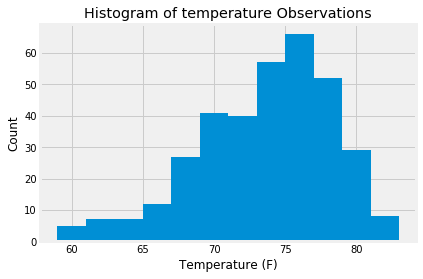

In [71]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = pd.DataFrame(session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > yearago).filter(Measurement.station == activestation).all())
temp_data.head()

plt.hist(temp_data['tobs'],bins = 12)
plt.title('Histogram of temperature Observations')
plt.ylabel('Count')
plt.xlabel('Temperature (F)')
plt.show()


## Bonus Challenge Assignment

In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [23]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
ourvacay = []
#Our first vacation will be from December 20 - January 4
ourvacay.append(calc_temps('2016-12-20', '2017-01-04')[0])
# Our second vacation will be from June 10 - June 21
ourvacay.append(calc_temps('2016-06-10', '2016-06-21')[0])

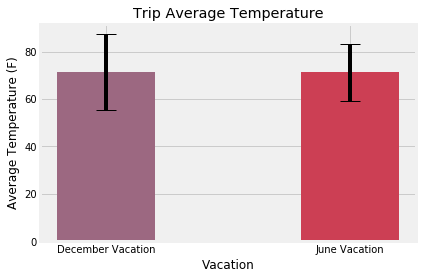

In [24]:

# Create an empty error list then populate it with the temperature differences
err = []
for i in ourvacay:
    err.append(i[2] - i[0])
labels = ['December Vacation', 'June Vacation']

# Plot our data for the two vacations
plt.bar(labels,ourvacay[0][1],yerr = err, width = [0.4,0.4], color = ['#9c6881','#cc3f54'], capsize = 10)
plt.title('Trip Average Temperature')
plt.ylabel('Average Temperature (F)')
plt.xlabel('Vacation')
plt.show()

In [25]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


# We're going to just use December Vacation for this section to avoid copy and pasting the same code 3 times
dstart = dt.datetime(2016, 12, 20)
dend = dt.datetime(2017,1,4)
dec_df = pd.DataFrame(session.query(Measurement.station, Measurement.date, Measurement.prcp).filter(Measurement.date <= dend).filter(Measurement.date >= dstart))

# Create an empty dictionary and then populate it with empty references to each station in our dataset
station_dictionary = {}

for eachstation in dec_df['station'].unique():
    station_dictionary[eachstation] = {}

# Loop through the stations that we collected and pull out the data from our station dataset
# Store this data in the empty dictionaries we created
for station in dec_df['station'].unique():
    temp_df = dec_df.loc[dec_df['station'] == station,:]
    precipitation = temp_df['prcp'].sum()
    for statid in stationlist:
        if statid[1] == station:
            station_dictionary[station]['Elevation'] = statid[5]
            station_dictionary[station]['Name'] = statid[2]
            station_dictionary[station]['Latitude'] = statid[3]
            station_dictionary[station]['Longitude'] = statid[4]
            station_dictionary[station]['Precipitation'] = precipitation
            

In [26]:
# Visualize the dictionary to make sure it has teh expected data
station_dictionary

{'USC00519397': {'Elevation': 3.0,
  'Name': 'WAIKIKI 717.2, HI US',
  'Latitude': 21.2716,
  'Longitude': -157.8168,
  'Precipitation': 0.24000000000000002},
 'USC00513117': {'Elevation': 14.6,
  'Name': 'KANEOHE 838.1, HI US',
  'Latitude': 21.4234,
  'Longitude': -157.8015,
  'Precipitation': 2.15},
 'USC00514830': {'Elevation': 7.0,
  'Name': 'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  'Latitude': 21.5213,
  'Longitude': -157.8374,
  'Precipitation': 1.55},
 'USC00517948': {'Elevation': 11.9,
  'Name': 'PEARL CITY, HI US',
  'Latitude': 21.3934,
  'Longitude': -157.9751,
  'Precipitation': 0.06},
 'USC00519523': {'Elevation': 19.5,
  'Name': 'WAIMANALO EXPERIMENTAL FARM, HI US',
  'Latitude': 21.33556,
  'Longitude': -157.71139,
  'Precipitation': 0.7},
 'USC00519281': {'Elevation': 32.9,
  'Name': 'WAIHEE 837.5, HI US',
  'Latitude': 21.45167,
  'Longitude': -157.84888999999998,
  'Precipitation': 2.8899999999999997},
 'USC00516128': {'Elevation': 152.4,
  'Name': 'MANOA LYON ARBO

In [27]:
# Create an empty precipitation list then take all of our precipitation values from our above dictionary
# Sort this list by highest precipitation
precipitation = []

for station in station_dictionary:
    precipitation.append(station_dictionary[station]['Precipitation'])
precipitation.sort(reverse = True)

# Print out our data in order of its precipitation value
for value in precipitation:
    for station in station_dictionary:
        if station_dictionary[station]['Precipitation']== value:
            print(f'Station ID: {station}')
            print(f'Station Name: {station_dictionary[station]["Name"]}')
            print(f'Station Latitude: {station_dictionary[station]["Latitude"]}')
            print(f'Station Longitude: {station_dictionary[station]["Longitude"]}')
            print(f'Station Elevation: {station_dictionary[station]["Elevation"]}')
            print(f'Station Precipitation: {value} \n')

        

Station ID: USC00516128
Station Name: MANOA LYON ARBO 785.2, HI US
Station Latitude: 21.3331
Station Longitude: -157.8025
Station Elevation: 152.4
Station Precipitation: 10.17 

Station ID: USC00519281
Station Name: WAIHEE 837.5, HI US
Station Latitude: 21.45167
Station Longitude: -157.84888999999998
Station Elevation: 32.9
Station Precipitation: 2.8899999999999997 

Station ID: USC00513117
Station Name: KANEOHE 838.1, HI US
Station Latitude: 21.4234
Station Longitude: -157.8015
Station Elevation: 14.6
Station Precipitation: 2.15 

Station ID: USC00514830
Station Name: KUALOA RANCH HEADQUARTERS 886.9, HI US
Station Latitude: 21.5213
Station Longitude: -157.8374
Station Elevation: 7.0
Station Precipitation: 1.55 

Station ID: USC00519523
Station Name: WAIMANALO EXPERIMENTAL FARM, HI US
Station Latitude: 21.33556
Station Longitude: -157.71139
Station Elevation: 19.5
Station Precipitation: 0.7 

Station ID: USC00519397
Station Name: WAIKIKI 717.2, HI US
Station Latitude: 21.2716
Station L

In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [29]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

day_list = []


normals = []


# Set the start and end date of the trip
startdate = '2016-12-20'
startdate = dt.datetime.strptime(startdate,'%Y-%m-%d')
enddate = '2017-01-04'
enddate = dt.datetime.strptime(enddate,'%Y-%m-%d')

# Loop through and create the date values for month and date by looping from our initial date until our last date
tempdate = startdate
while tempdate <= enddate:
    month = tempdate.strftime("%m")
    day = tempdate.strftime("%d")
    tempform = f"{month}-{day}"
    day_list.append(tempform)
    
    tempdate = tempdate + dt.timedelta(days = 1)
    
# Call the function and obtain our normals
for vacationdate in day_list:
    normals.append(daily_normals(vacationdate)[0])
    
# Visualize the output to check our results
normals

[(65.0, 72.91304347826087, 81.0),
 (67.0, 72.13953488372093, 78.0),
 (67.0, 71.1304347826087, 77.0),
 (61.0, 70.34693877551021, 78.0),
 (62.0, 70.0625, 78.0),
 (60.0, 71.75, 79.0),
 (63.0, 71.44680851063829, 77.0),
 (62.0, 71.91666666666667, 79.0),
 (62.0, 70.52083333333333, 77.0),
 (57.0, 70.29166666666667, 78.0),
 (63.0, 69.86363636363636, 76.0),
 (56.0, 68.27906976744185, 77.0),
 (62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0)]

In [30]:
# Place these values in to a dataframe and add date as the index
normals_df = pd.DataFrame(normals, columns = ['Min_Temp', 'Avg_Temp', 'Max_Temp'])
normals_df['Date'] = day_list
normals_df = normals_df.set_index('Date')
normals_df

,Min_Temp,Avg_Temp,Max_Temp
Date,,,
12-20,65.0,72.913043,81.0
12-21,67.0,72.139535,78.0
12-22,67.0,71.130435,77.0
12-23,61.0,70.346939,78.0
12-24,62.0,70.062500,78.0
12-25,60.0,71.750000,79.0
12-26,63.0,71.446809,77.0
12-27,62.0,71.916667,79.0
12-28,62.0,70.520833,77.0


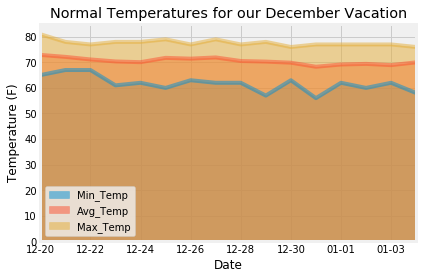

In [56]:
# Plot the daily normals as an area plot with `stacked=False`
normals_df.plot.area(stacked = False)
plt.title('Normal Temperatures for our December Vacation')
plt.ylabel('Temperature (F)')
plt.show()